# IMAGE FEATURE EXTRACTION EXERCISE #

1. Extract machine code from json -“MachineCode” section inside jsons directory.
2. Take 8100 first characters of machine code.
3. Convert vector into integers ranging between 0 to 255.
4. Reshape vector to 90x90 matrix.
5. Turn to into grayscale png image.
6. Visualize in jupyter notebook


In [2]:
import array
import json
import os
import sys
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20, 20

In [3]:
files = os.listdir("./jsons")

filen = "./jsons/" + files[0]

In [46]:
import json
ln=8100
pics = []
for filen in files:
    with open("./jsons/" +filen, "rb") as f:
        try:
            s = f.read()
            #convert to json
            jsn =  json.loads(s)
            # get the right header from the json. HINT:in sectionHeaders and not in .rdata, .rsrc, .data
            #print (jsn["sectionHeaders"][".reloc"]["machineCode"])#.keys())
            #print (jsn["sectionHeaders"][".text"]["addressOfEntryPointMachineCodeSnippet"]) # .keys())#[0]))
            #break
            
            
            header = "addressOfEntryPointMachineCodeSnippet"#addressOfEntryPointMachineCodeSnippet"
            headers = jsn["sectionHeaders"][".text"][header] #"addressOfEntryPointMachineCodeSnippet"#"machineCode"
            
            #print (jsn)

            
            if len(headers) > 0:
                lengths = [len(header) for header in headers]
                # get the machine code. HINT: machine code under sectionHeaders.
                machinecode =  headers
                
                
#                 #left justify the json with zero padding 
#                 #machinecode = ...
#                 # convert machine code string to numpy and turn into 90x90 matrix
                machinecode = machinecode.ljust(8100,"0")
               
#                 break
                machinecode = np.asarray([ord(letter) if letter.isdigit() == False else letter for letter in machinecode ])
                
                g = machinecode.reshape(90,90).astype("float")
#                 print(machinecode)
                pics.append(g)
            else:
                print("no section headers for ", filen)

        except Exception as e:
            print (e , filen)


'.text' 8661209e1294ca62b0eb4f4e529906d7.json
no section headers for  866390bbef78d33a091b885913adbdc6.json
no section headers for  866e4c79955c39e24f6970ad49f4a096.json


In [47]:
pics[0][0:,0]

array([ 5.,  7.,  7.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

## show the images in a grid of 5x5

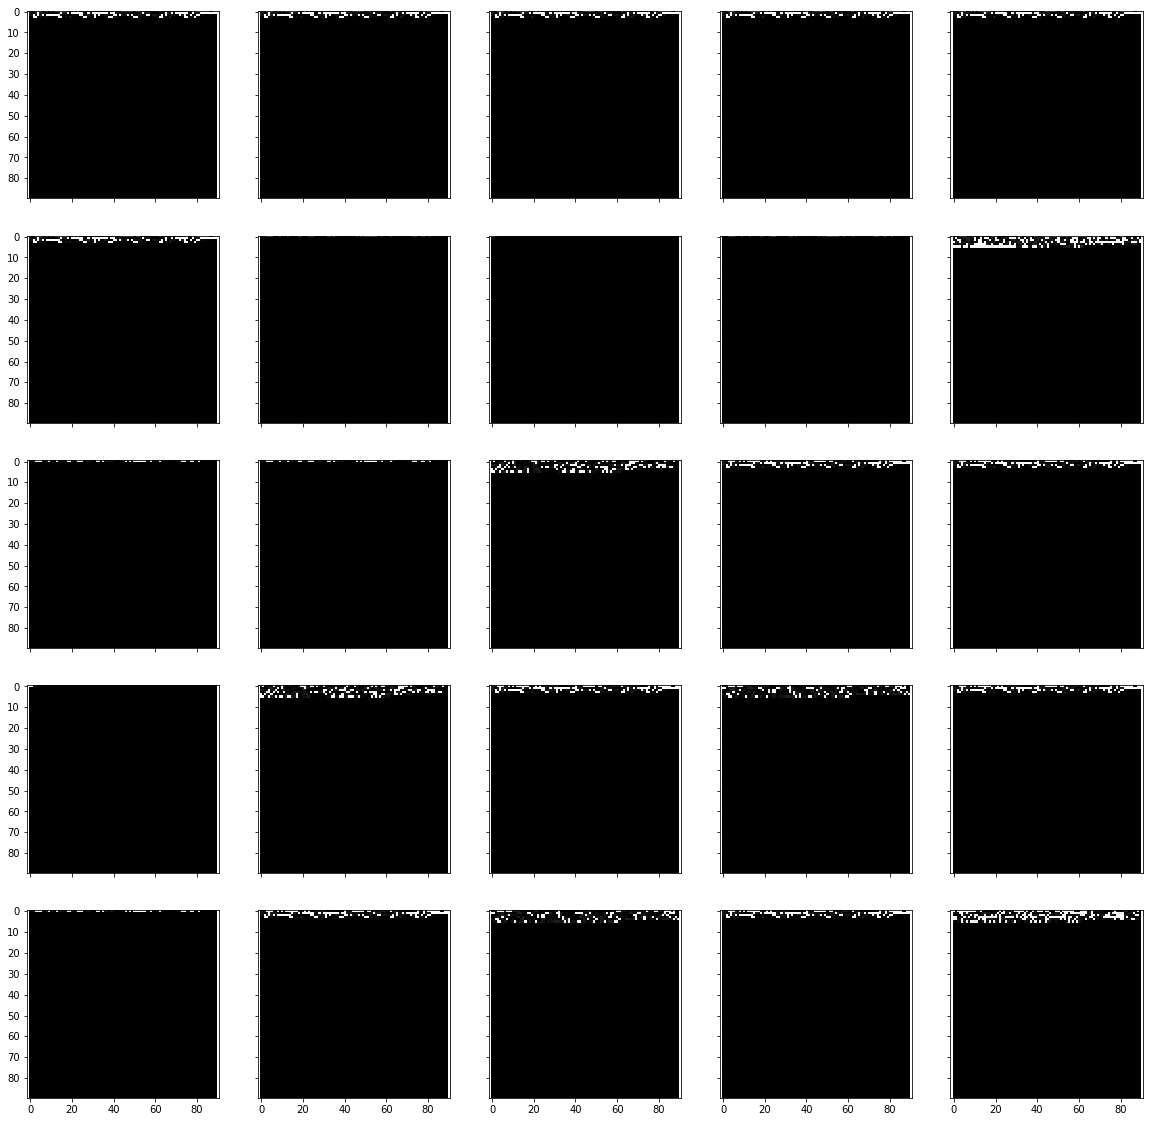

In [48]:
h=5
w=5
_, axs = plt.subplots(h, w, sharex='col', sharey='row')
for i in range(h):
    for j in range(w):
        axs[i,j].imshow(pics[i+i*j], cmap="gray")